In [693]:
import time
from math import sin, cos, sqrt, atan2, radians, pow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

DATA_new=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\space_time_total_catalogue.csv")
DATA_new

,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,2.885439e+07,1907.0,0.0,24328471,2020-04-28T13:00:30.050000,38.4607,13.64330,17.7,SURVEY-INGV,NaN,NaN,NaN,ML,3.5,--,Tirreno Meridionale (MARE)
1,3.537832e+06,2.0,1.0,24326871,2020-04-28T07:14:45.750000,38.5943,14.17220,27.5,SURVEY-INGV,NaN,NaN,NaN,ML,3.0,--,Tirreno Meridionale (MARE)
2,8.460595e+06,9.0,2.0,24326451,2020-04-28T05:57:28.820000,38.4052,13.60600,25.4,SURVEY-INGV,NaN,NaN,NaN,ML,3.1,--,Costa Siciliana centro-settentrionale (Palermo)
3,3.531638e+07,6208.0,3.0,24317311,2020-04-26T02:59:02.450000,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA)
4,2.325441e+06,36.0,4.0,24313381,2020-04-25T07:21:54.480000,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,1.353561e+07,11187.0,11186.0,809,1985-01-09T03:13:01.090000,43.3020,12.63800,4.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,8 km SE Gubbio (PG)
11187,3.940260e+03,11189.0,11187.0,769,1985-01-08T23:33:34.130000,43.3030,12.55000,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.6,--,6 km SW Gubbio (PG)
11188,7.166286e+04,11191.0,11188.0,599,1985-01-07T11:07:55.060000,44.2220,6.77800,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.0,--,Confine Italia-Francia (FRANCIA)
11189,5.534019e+05,11191.0,11189.0,529,1985-01-07T00:34:49.290000,43.2250,12.73000,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km W Gualdo Tadino (PG)


In [1131]:
list_TR=[]
b=1.2
DATA_new['Time']=DATA_new['Time'].astype(np.datetime64)
for e in DATA_new.index:
    aft=int(DATA_new['Aftershock'].iloc[e])
    main=int(DATA_new['Mainshock'].iloc[e])
    if main <11191:
        dtime=((DATA_new['Time'].iloc[e]-DATA_new['Time'].iloc[main])).total_seconds()
        mag=DATA_new['Magnitude'].iloc[main]
        r=((DATA_new['Spacetime_distance'].iloc[e])/(dtime*pow(10,(-b*(mag)))))
        r=r*r**0.15
        T=dtime*pow(10,-b*((mag)/2))
        R=(r*pow(10,(-b*(mag)/2)))
        list_TR.append([T,R,mag,e])

In [1132]:
TR=pd.DataFrame(list_TR)
TR.rename({0:'T',1:'R',2:'Magnitude',3:'Index'},axis=1,inplace=True)

(0.01, 57000000)

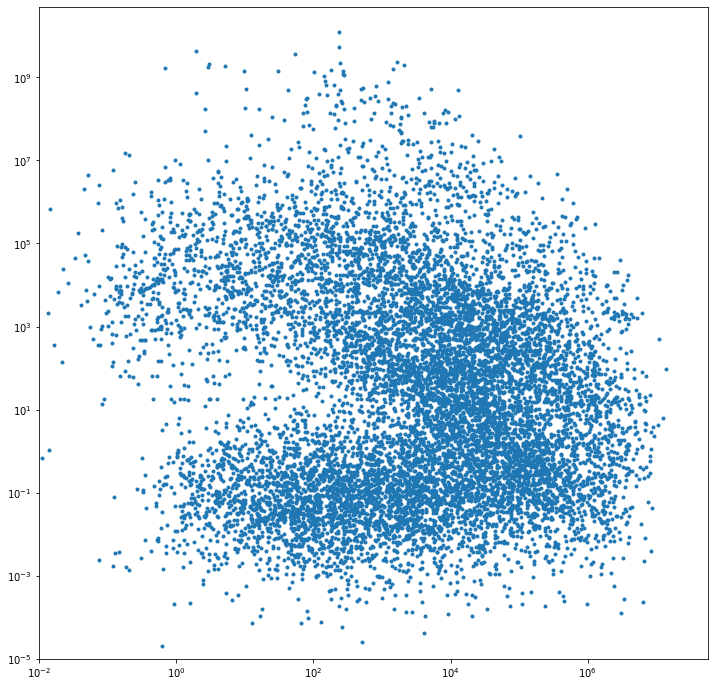

In [1133]:
from scipy.stats import gaussian_kde
f, a = plt.subplots(figsize=(12,12))
xy = np.vstack([TR['T'],TR['R']])
z = gaussian_kde(xy)(xy)
bins = np.logspace(0,7,num=50) 
#sns.distplot(TR['T'],TR['R'], (60, 60), cmap=plt.cm.jet ,bins=bins)
#plt.colorbar()
#abc=sns.scatterplot(TR['T'],TR['R'],c=z)
s = a.scatter(TR['T'],TR['R'],s=9) #,c=z, s=10, cmap='jet', edgecolor='', label=None, picker=True, zorder=2 )   
plt.xscale('log')
plt.yscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.ylim((0.00001, 50000000000))
plt.xlim((0.01, 57000000))                                                                                                                                    


In [1176]:
indici=[]
for tr in TR.index:
    if TR['T'].iloc[tr]*TR['R'].iloc[tr]>1643 and TR['T'].iloc[tr]>42: #and TR['R'].iloc[tr]>0.001  :
        indici.append(TR['Index'].iloc[tr])
indici=pd.Series(indici)
indici.rename='index'
indici = indici.to_frame('index')

In [1177]:
DECLUSTERED=pd.merge(DATA_new,indici,left_index=True,right_on='index')

In [1178]:
df=DECLUSTERED
df.sort_values(by='Time',ascending=True,inplace=True)
num=pd.Series([i for i in reversed(range(0,int(df.size/len(df.columns))))])  #range(0,2,-1) gives [2,1], riversed gives [1,0]
df=pd.concat([df,num],axis=1)
df.set_index(0,inplace=True)
df=df[::-1]

In [1179]:

a=df[(df['Magnitude']>3.9)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,1,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(31)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


189.8169690704702

(array([ 46.,  86., 115., 263., 123.,   9.,  34.,  81., 162.]),
 array([ 68.        ,  79.88888889,  91.77777778, 103.66666667,
        115.55555556, 127.44444444, 139.33333333, 151.22222222,
        163.11111111, 175.        ]),
 <a list of 9 Patch objects>)

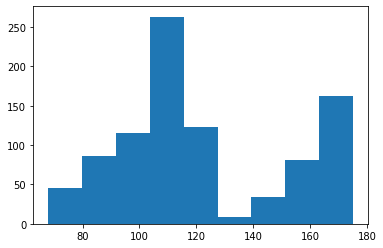

In [1102]:
plt.hist(nt,bins=9)